**Load the Dataset**

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

<Axes: xlabel='Survived', ylabel='count'>

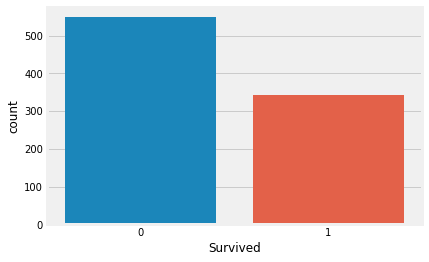

In [61]:
## categorical attributes
sns.countplot(x=train['Survived'])


<Axes: xlabel='Pclass', ylabel='count'>

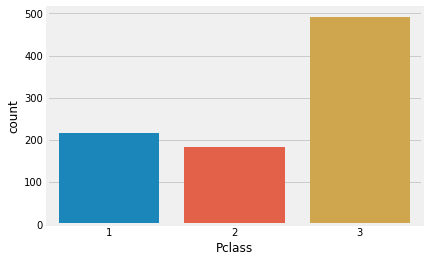

In [62]:
sns.countplot(x=train['Pclass'])

<Axes: xlabel='SibSp', ylabel='count'>

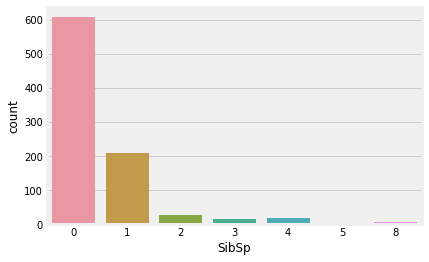

In [63]:
sns.countplot(x=train['SibSp'])

Text(0.5, 1.0, 'Training set - Histogram plot of Age')

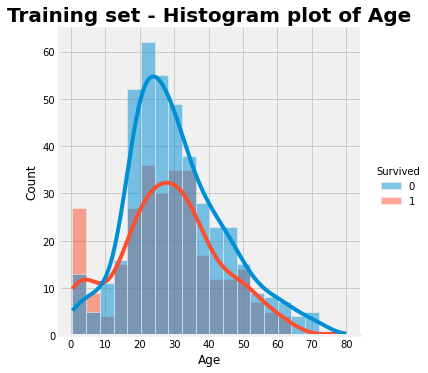

In [64]:
sns.displot(data=train, x='Age', kde = True, hue='Survived')
plt.title("Training set - Histogram plot of Age", fontsize=20, fontweight='bold')

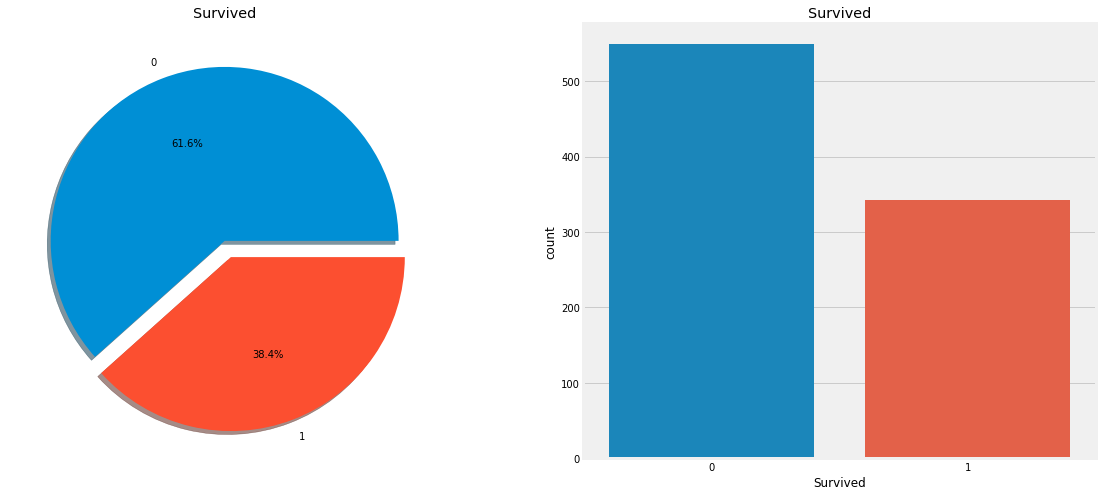

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: xlabel='Parch', ylabel='count'>

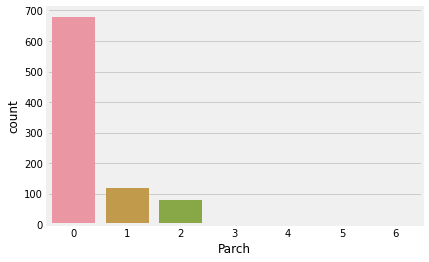

In [66]:
sns.countplot(x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

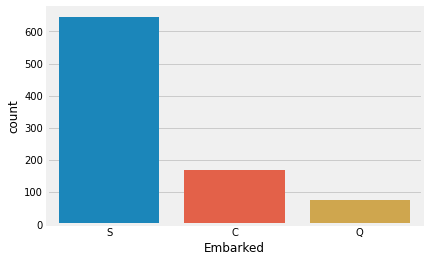

In [67]:
sns.countplot(x=train['Embarked'])

<Axes: ylabel='Density'>

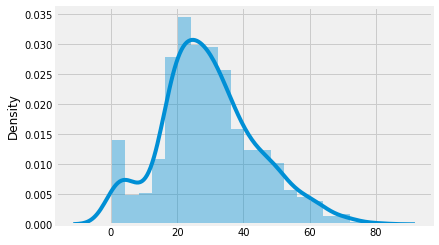

In [68]:
## numerical attributes
sns.distplot(x=train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

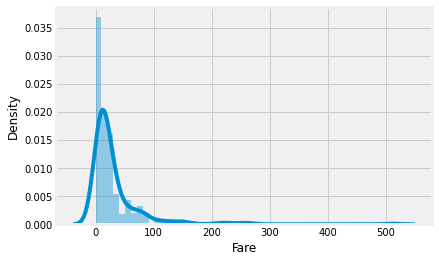

In [69]:
sns.distplot(train['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

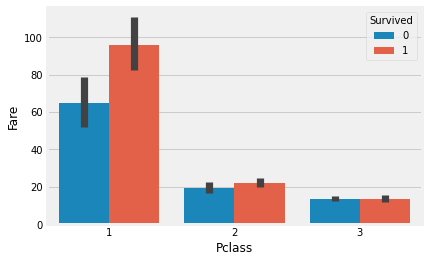

In [70]:
#This plot has a comparison of survived passengers depending on the ticket fare and passenger class.
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

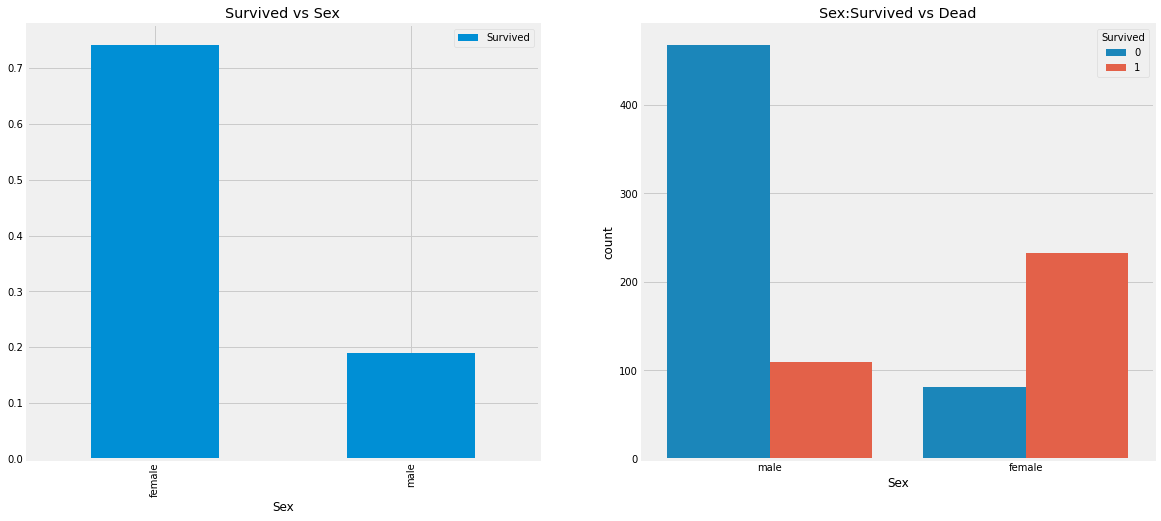

In [71]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

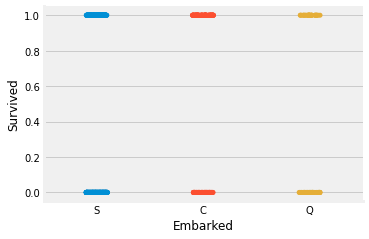

In [72]:
#Chances for Survival by Port Of Embarkation
sns.catplot(x='Embarked',y='Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

In [73]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


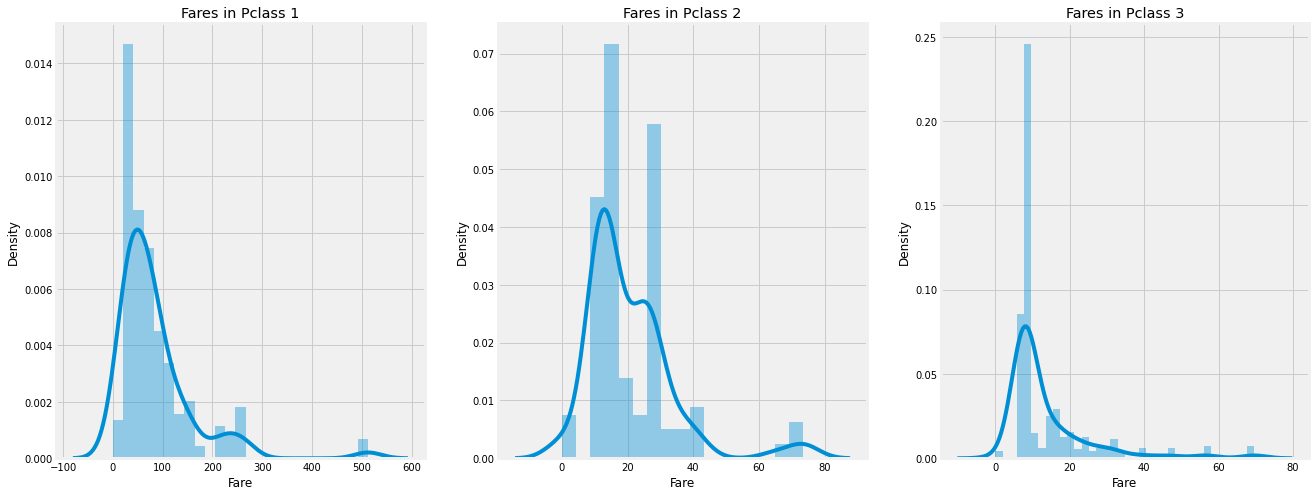

In [74]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

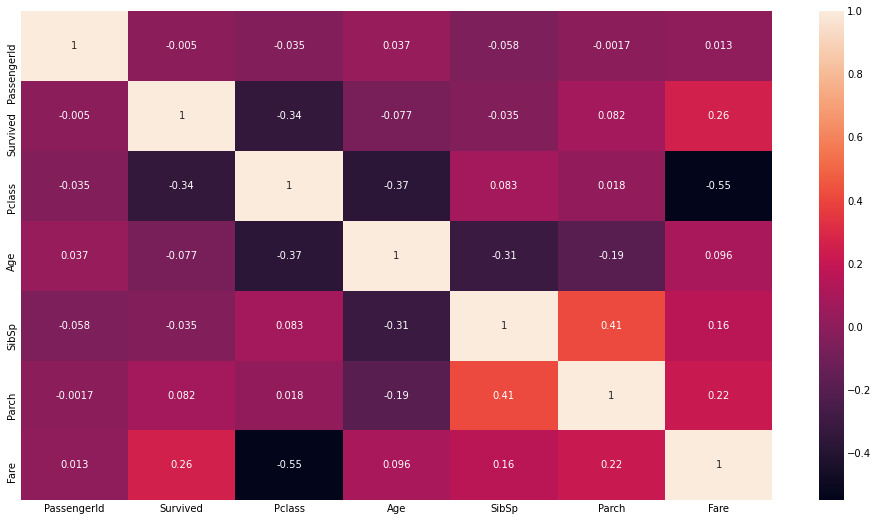

In [75]:
train_num = [feature for feature in train.columns if train[feature].dtypes != "O"]
train_num
train_num = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
plt.figure(figsize=(15,9))
sns.heatmap(train_num.corr(), annot=True)
plt.show()